# Inheritance in python 

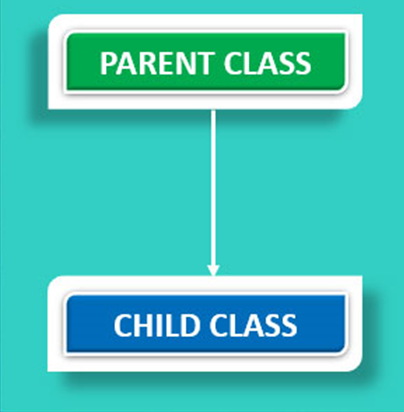


### Inheritance means Child class can reuse the attributes and functions from the Parent class (super class)

In [1]:
class Person:

    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def intro(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")

In [2]:
class Employee(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work at {self.company}")

In [3]:
p1 = Person(name="Sarthak", age=25)
type(p1)

__main__.Person

In [4]:
p1.name

'Sarthak'

In [5]:
p1.age

25

In [6]:
p1.intro()

My name is Sarthak
I am 25 years old


In [7]:
e1 = Employee(name="Raman", age=37, company="TCS")
type(e1)

__main__.Employee

In [8]:
e1.name

'Raman'

In [9]:
e1.age

37

In [12]:
e1.company

'TCS'

In [13]:
e1.work

<bound method Employee.work of <__main__.Employee object at 0x000001CDB2448EC0>>

In [14]:
# intro is inherited from parent class Person
e1.intro()

My name is Raman
I am 37 years old


In [15]:
e2 = Employee(name=23, age="Example", company=False)

In [16]:
e2.name

23

In [18]:
e2.age

'Example'

In [19]:
e2.company

False

In [20]:
e2

### Data validation with pydantic


In [21]:

%pip install pydantic email-validator

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------------- ------------------ 1.0/2.0 MB 3.1 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Pydantic checks
1.ge - greater than or equal to
2.gt - greater than
3.le - less than or equal to
4.lt - less than

In [23]:
from pydantic import BaseModel, EmailStr, Field
from typing import Literal

In [24]:
class Student(BaseModel):
    roll_no: int = Field(description="Student Roll number", ge=101)
    name: str = Field(descrioption="Student name", min_length=3, max_length=50)
    age: int = Field(description="Student Age", gt=0, le=100)
    gender: Literal["male", "female"] = Field(description="Student gender")
    email: EmailStr = Field(description="Student Email")
    hobbies: list[str] = Field(description="Studen hobbies", default_factory=list)

    def get_info(self):
        print(f"Roll no : {self.roll_no}")
        print(f"Name : {self.name}")
        print(f"Age : {self.age}")
        print(f"Gender : {self.gender}")
        print(f"Email : {self.email}")
        print(f"Hobbies : {self.hobbies}")

In [25]:
s1 = Student(
    roll_no=101,
    name="Aditi",
    age=28,
    gender="female",
    email="aditi@test.com",
    hobbies=["Singing", "Cycling"],
)

In [26]:
type(s1)

__main__.Student

In [27]:
s1

Student(roll_no=101, name='Aditi', age=28, gender='female', email='aditi@test.com', hobbies=['Singing', 'Cycling'])

In [28]:
s1.roll_no

101

In [29]:
s1.name

'Aditi'

In [30]:
s1.age

28

In [31]:
s1.gender

'female'

In [32]:
s1.email

'aditi@test.com'

In [33]:
s1.hobbies

['Singing', 'Cycling']

In [34]:
s1.get_info

<bound method Student.get_info of Student(roll_no=101, name='Aditi', age=28, gender='female', email='aditi@test.com', hobbies=['Singing', 'Cycling'])>

In [35]:
s2 = Student(
    roll_no=1, name="Rahul", age=25, gender="male", email="random", hobbies={"a": 1}
)

ValidationError: 3 validation errors for Student
roll_no
  Input should be greater than or equal to 101 [type=greater_than_equal, input_value=1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than_equal
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='random', input_type=str]
hobbies
  Input should be a valid list [type=list_type, input_value={'a': 1}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/list_type

In [36]:
s2

NameError: name 's2' is not defined

In [37]:
s3 = Student(roll_no=-12, name=False, age=101, gender="M", email=True, hobbies=12)

ValidationError: 6 validation errors for Student
roll_no
  Input should be greater than or equal to 101 [type=greater_than_equal, input_value=-12, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than_equal
name
  Input should be a valid string [type=string_type, input_value=False, input_type=bool]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type
age
  Input should be less than or equal to 100 [type=less_than_equal, input_value=101, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/less_than_equal
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='M', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error
email
  Input should be a valid string [type=string_type, input_value=True, input_type=bool]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type
hobbies
  Input should be a valid list [type=list_type, input_value=12, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/list_type

### 2. Multiple Inheritance
### One child class can inherit from multiple parent classes



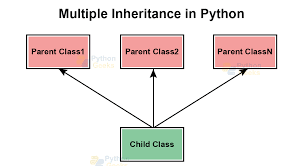

In [39]:
class BaseSalary:

    def __init__(self, base_sal: float):
        self.base_sal = base_sal

    def get_base_salary(self):
        print(f"Base Salary is {self.base_sal:.2f} INR")

In [40]:
class Bonus:

    def __init__(self, per_bonus: float):
        self.per_bonus = per_bonus

    def calculate_bonus(self, base_sal: float) -> float:
        return (self.per_bonus / 100) * base_sal

In [41]:
class Tax:

    def __init__(self, tax_rate: float):
        self.tax_rate = tax_rate

    def calculate_tax(self, base_sal):
        return (self.tax_rate / 100) * base_sal

In [42]:
class TotalSalary(BaseSalary, Bonus, Tax):

    def __init__(self, base_sal: float, per_bonus: float, tax_rate: float):
        BaseSalary.__init__(self, base_sal)
        Bonus.__init__(self, per_bonus)
        Tax.__init__(self, tax_rate)

    def get_total_salary(self):
        bonus = self.calculate_bonus(self.base_sal)
        tax = self.calculate_tax(self.base_sal)
        return self.base_sal + bonus - tax

In [43]:
t1 = TotalSalary(base_sal=5_00_000, per_bonus=25, tax_rate=10)

In [44]:
type(t1)

__main__.TotalSalary

In [46]:
t1.base_sal

500000

In [47]:
t1.get_base_salary()

Base Salary is 500000.00 INR


In [48]:
t1.calculate_bonus(t1.base_sal)

125000.0

In [49]:
t1.calculate_tax(t1.base_sal)

50000.0

In [50]:
t1.get_total_salary()

575000.0

In [51]:
500000 + 125000 - 50000

575000

In [52]:
t1.base_sal

500000

In [53]:
t1.per_bonus

25

In [54]:
t1.tax_rate

10

### Multilevel inheritance and Hierarchical inehritance will continue in next class

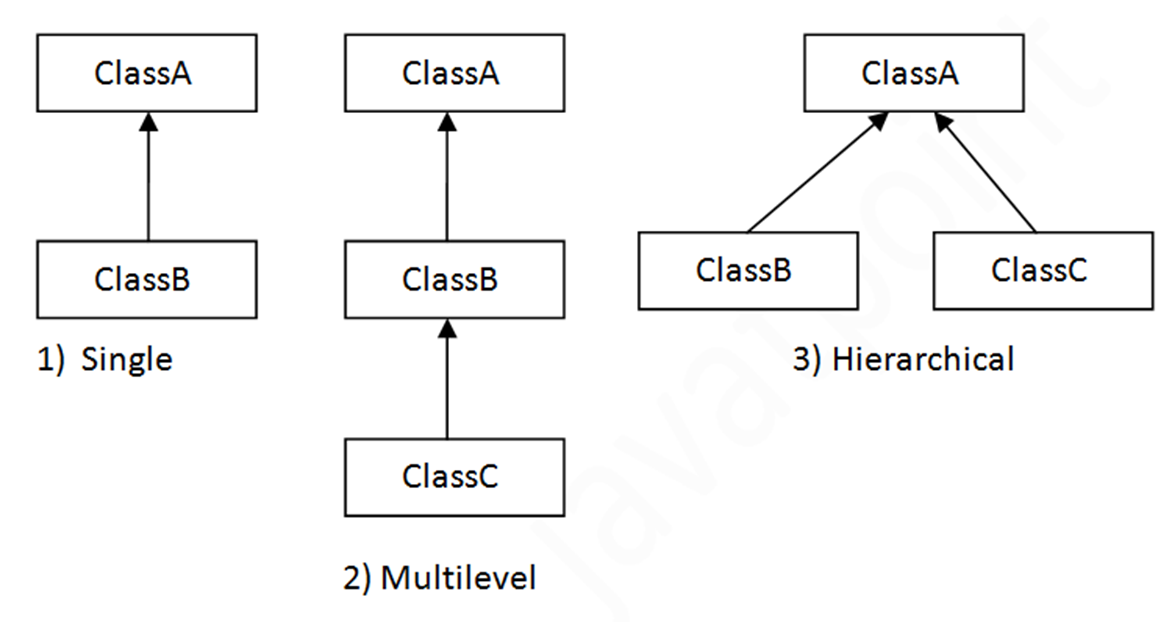

### Multilevel inheritance

In [55]:
import pandas as pd

In [56]:
# Assuming i want to read csv file
class DataLoader:

    def __init__(self, path: str):
        self.path = path
        self.data = None

    def load_data(self) -> pd.DataFrame:
        self.data = pd.read_csv(self.path, keep_default_na=False, na_values=["", "NA"])
        print(f"File loaded from : {self.path}")
        return self.data


### In data cleaning
### 1.Replace continuous values (numeric) with mean / median
### 2.Replace categorical values (text) with mode

In [57]:
# Create a data cleaner class
class DataCleaner(DataLoader):

    def seperate_cat_con(self):
        cat = list(self.data.columns[self.data.dtypes == "object"])
        con = list(self.data.columns[self.data.dtypes != "object"])
        return {"cat": cat, "con": con}

    def clean_data(self) -> pd.DataFrame:
        if self.data is not None:
            cat = list(self.data.columns[self.data.dtypes == "object"])

            for col in self.data.columns:
                if col in cat:
                    mode = self.data[col].mode()[0]
                    self.data[col] = self.data[col].fillna(mode)
                else:
                    median = self.data[col].median()
                    self.data[col] = self.data[col].fillna(median)
            print("Data Cleaning Done")
        else:
            print("Data is not loaded")

        return self.data

In [59]:
# Create a data analyzer
class DataAnalyzer(DataCleaner):

    def describe_data(self):
        if self.data is not None:
            num_desc = self.data.describe(exclude="object").T
            cat_desc = self.data.describe(include="object").T
            print("Numerical Description :")
            print(num_desc)
            print("\nCateogircal Description :")
            print(cat_desc)
        else:
            print("Data is not loaded")

    def groupby_and_visualize_data(self, col1: str, col2: str, agg: str):
        if self.data is not None:
            grouped_data = (
                self.data.groupby(by=col1)
                .agg({col2: agg})
                .sort_values(by=col2, ascending=False)
                .round(2)
            )
            grouped_data.plot(kind="bar", figsize=(10, 5))
        else:
            print("Data not loaded")


### Applying above classes to actual csv file

In [105]:
data_analyzer = DataAnalyzer(path="Cars93.csv")
type(data_analyzer)

__main__.DataAnalyzer

In [106]:
data_analyzer.path

'Cars93.csv'

In [107]:
print(data_analyzer.data)

None


In [108]:
df2 = data_analyzer.load_data()
df2.head()

File loaded from : Cars93.csv


,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [109]:
m = df2.isna().sum()
m[m > 0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [110]:
data_analyzer.data.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [111]:
data_analyzer.seperate_cat_con()

{'cat': ['Manufacturer',
  'Model',
  'Type',
  'AirBags',
  'DriveTrain',
  'Cylinders',
  'Man.trans.avail',
  'Origin',
  'Make'],
 'con': ['id',
  'Min.Price',
  'Price',
  'Max.Price',
  'MPG.city',
  'MPG.highway',
  'EngineSize',
  'Horsepower',
  'RPM',
  'Rev.per.mile',
  'Fuel.tank.capacity',
  'Passengers',
  'Length',
  'Wheelbase',
  'Width',
  'Turn.circle',
  'Rear.seat.room',
  'Luggage.room',
  'Weight']}

In [112]:
data_analyzer.data.columns[data_analyzer.data.dtypes == "object"]

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

In [113]:
data_analyzer.clean_data()

Data Cleaning Done


,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,14.0,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [114]:
data_analyzer.data.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [115]:
data_analyzer.describe_data()

Numerical Description :
                    count         mean         std     min     25%     50%  \
id                   93.0    47.000000   26.990739     1.0    24.0    47.0   
Min.Price            93.0    17.125806    8.746029     6.7    10.8    14.7   
Price                93.0    19.509677    9.659430     7.4    12.2    17.7   
Max.Price            93.0    21.898925   11.030457     7.9    14.7    19.6   
MPG.city             93.0    22.365591    5.619812    15.0    18.0    21.0   
MPG.highway          93.0    29.086022    5.331726    20.0    26.0    28.0   
EngineSize           93.0     2.667742    1.037363     1.0     1.8     2.4   
Horsepower           93.0   143.827957   52.374410    55.0   103.0   140.0   
RPM                  93.0  5280.645161  596.731690  3800.0  4800.0  5200.0   
Rev.per.mile         93.0  2332.204301  496.506525  1320.0  1985.0  2340.0   
Fuel.tank.capacity   93.0    16.664516    3.279370     9.2    14.5    16.4   
Passengers           93.0     5.086022  

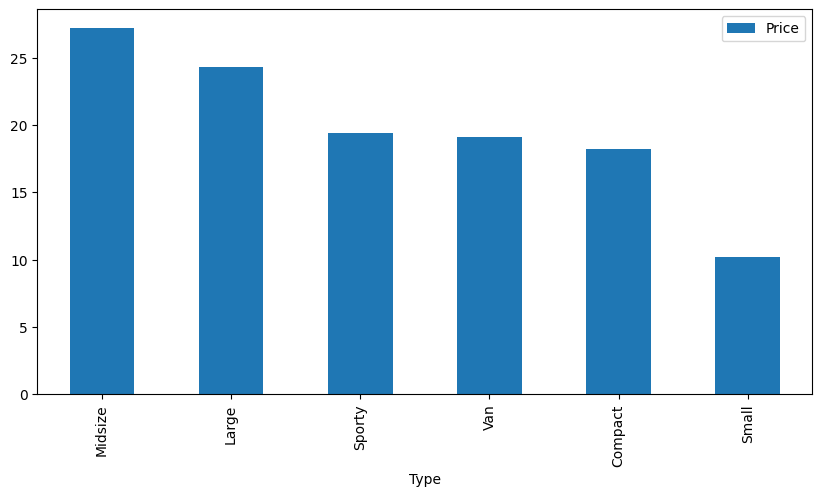

In [116]:
# find average price by type
data_analyzer.groupby_and_visualize_data(col1="Type", col2="Price", agg="mean")

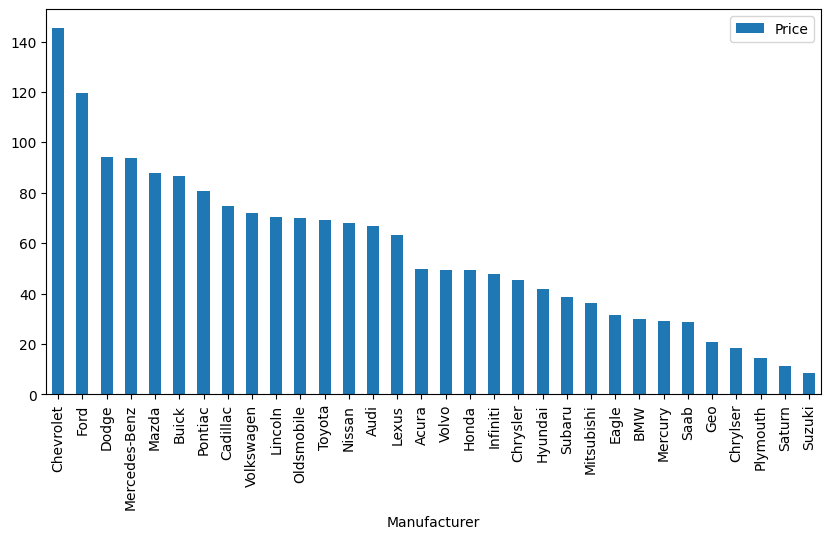

In [117]:
# Find out total price by manufacturer
data_analyzer.groupby_and_visualize_data(col1="Manufacturer", col2="Price", agg="sum")

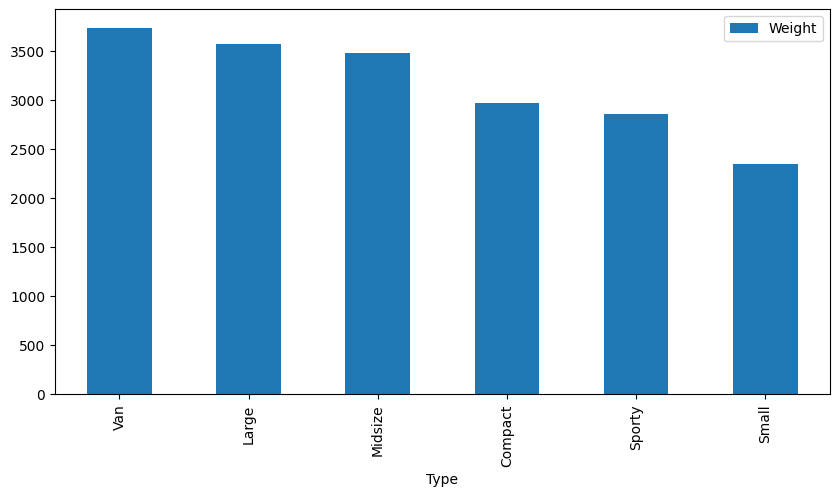

In [118]:
# Get median weight of car by type
data_analyzer.groupby_and_visualize_data(col1="Type", col2="Weight", agg="median")

### Hierarchical Inheritance
abc - abstract base class

In [119]:
from abc import ABC, abstractmethod

In [120]:
class Shape(ABC):

    @abstractmethod
    def perimeter(self) -> float | int:
        pass

    @abstractmethod
    def area(self) -> float | int:
        pass

In [121]:
class Rectange(Shape):

    def __init__(self, length, width):
        self.length = length
        self.width = width

    def perimeter(self):
        return 2 * (self.length + self.width)

    def area(self):
        return self.length * self.width

In [122]:
from math import pi

In [123]:
pi

3.141592653589793

In [124]:
class Circle(Shape):

    def __init__(self, radius):
        self.radius = radius

    def perimeter(self):
        return 2 * pi * self.radius

    def area(self):
        return pi * (self.radius**2)

In [126]:
class Triangle(Shape):

    def __init__(self, h, w):
        self.h = h
        self.w = w

    def area(self):
        return (1 / 2) * self.h * self.w

    def perimeter(self):
        pass

In [127]:
s1 = Rectange(length=20, width=10)
type(s1)

__main__.Rectange

In [128]:
s1.length

20

In [129]:
s1.width

10

In [130]:
s1.perimeter

<bound method Rectange.perimeter of <__main__.Rectange object at 0x000001CDBCBD3770>>

In [131]:
s1.area

<bound method Rectange.area of <__main__.Rectange object at 0x000001CDBCBD3770>>

In [132]:
s2 = Circle(radius=21)
type(s2)

__main__.Circle

In [133]:
s2.radius

21

In [134]:
s2.perimeter()

131.94689145077132

In [135]:
s2.area()

1385.4423602330987

In [136]:
s3 = Triangle(h=20, w=30)
s3.area()

300.0

In [137]:
s3.perimeter

<bound method Triangle.perimeter of <__main__.Triangle object at 0x000001CDBCBD2270>>